In [2]:
# example of horizontal shift image augmentation
from numpy import expand_dims
import os
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
import scipy
import pathlib
import PIL
import matplotlib.pyplot as plt
import Augmentor


2023-01-06 00:08:49.070217: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
DATA_DIR = "/Users/ruhiyusuf/projects/frc-vision/modeltraining/data" # change path accordingly

NUM_CLASSES = 30

In [25]:
# convert png to jpeg
from PIL import Image
for i in range(0, NUM_CLASSES):
    im1 = Image.open(os.path.join(DATA_DIR, str(i) + '.png'))
    im1 = im1.convert('RGB')
    im1.save(os.path.join(DATA_DIR, str(i) + '.jpeg'))

In [21]:
# add img to new folders
for i in range(0, NUM_CLASSES):
    if (not(os.path.exists(os.path.join(DATA_DIR, str(i))))):
        os.mkdir(os.path.join(DATA_DIR, str(i)))
        os.rename(os.path.join(DATA_DIR, str(i) + '.jpeg'), os.path.join(DATA_DIR, str(i), str(i) + '.jpeg'))
    

FileExistsError: [Errno 17] File exists: '/Users/ruhiyusuf/projects/frc-vision/modeltraining/data/0'

Total # of images: 30


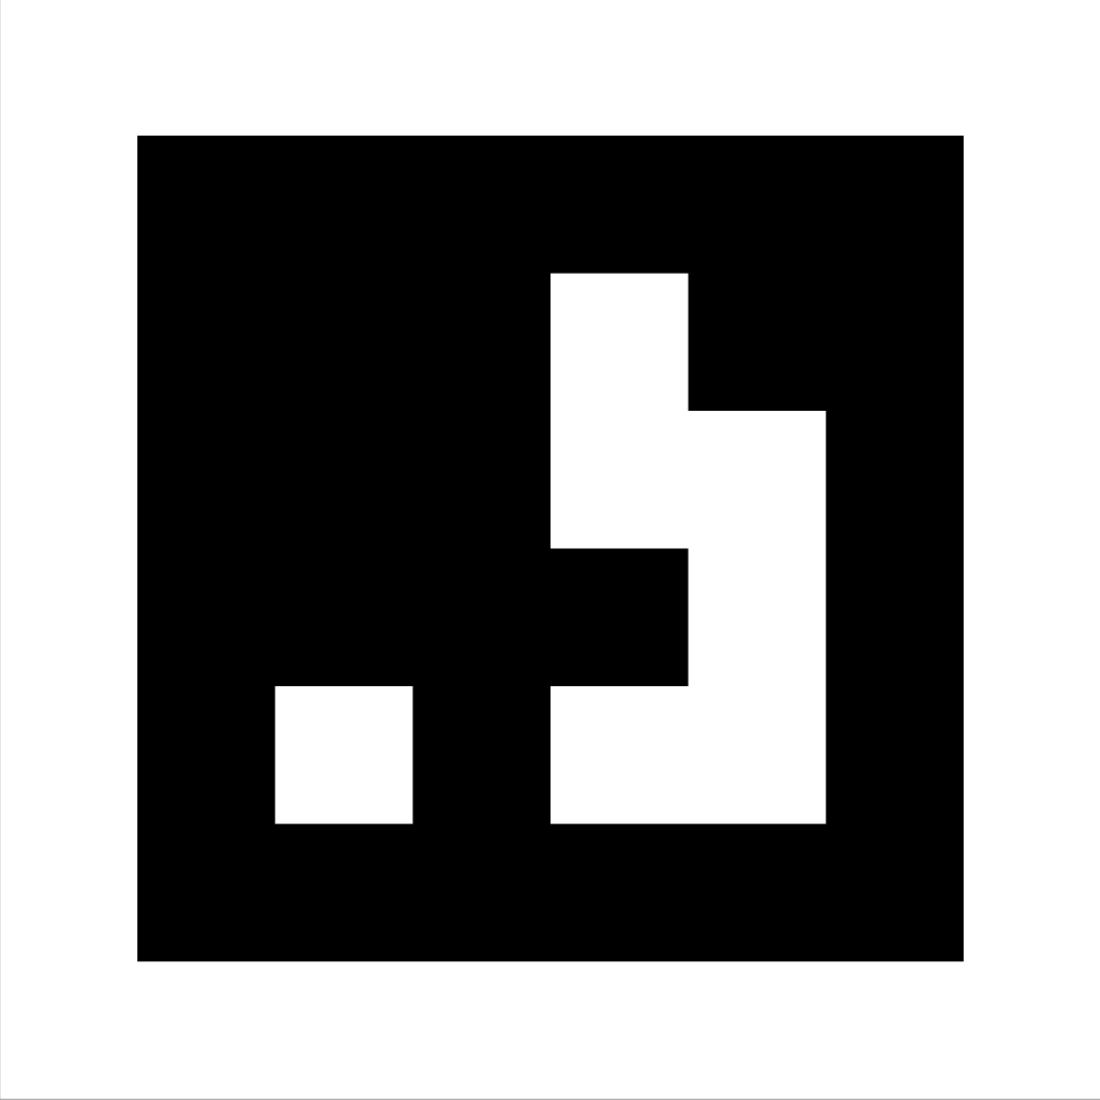

In [45]:
import pathlib
image_count = len(list(pathlib.Path(DATA_DIR).glob('*/*.jpeg')))
print("Total # of images:", image_count)

id0 = list(pathlib.Path(DATA_DIR).glob('0/*'))
PIL.Image.open(str(id0[0]))

In [21]:
# create data generator
img = load_img(os.path.join(DATA_DIR, '0.png'))

# convert to numpy array
data = img_to_array(img)

In [ ]:
# adding to model architecture
trainAug = Sequential([
	preprocessing.Rescaling(scale=1.0 / 255),
	preprocessing.RandomFlip("horizontal_and_vertical"),
	preprocessing.RandomZoom(
		height_factor=(-0.05, -0.15),
		width_factor=(-0.05, -0.15)),
	preprocessing.RandomRotation(0.3)
])



In [ ]:
def augment(images, labels):
	images = tf.image.random_flip_left_right(images)
	images = tf.image.random_flip_up_down(images)
	images = tf.image.rot90(images)

	return (images, labels)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
(1100, 1100, 3)


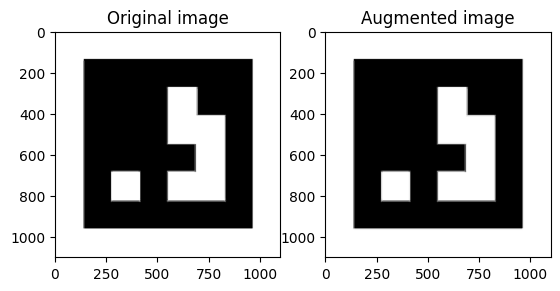

In [59]:

# create data generator
img = load_img(os.path.join(DATA_DIR, '0', '0.jpeg'))

# convert to numpy array
img = img_to_array(img)

def augment_sample(image):
	# image = tf.image.random_flip_left_right(image)
	# image = tf.image.random_flip_up_down(image)
	# image = tf.image.rot90(image)
    image = tf.image.random_jpeg_quality(image, 0, 10)
    return image

def visualize(original, augmented):
  fig = plt.figure()
  plt.subplot(1,2,1)
  plt.title('Original image')
  plt.imshow(original)

  plt.subplot(1,2,2)
  plt.title('Augmented image')
  plt.imshow(augmented)


visualize(img, augment_sample(img))
print(img.shape)



In [16]:
import glob
import os
import shutil

for i in range(0, NUM_CLASSES):
    class_dir = os.path.join(DATA_DIR, str(i))
    p = Augmentor.Pipeline(class_dir)

    p.shear(probability=0.40, max_shear_left=20, max_shear_right=20)
    # p.skew_left_right(probability=1.0)
    # p.skew(probability=0.5)
    p.skew(probability=0.9)
    p.sample(50)

    # PIL.Image.open(os.path.join(DATA_DIR, "0", "0.jpeg"))
    for files in os.listdir(os.path.join(class_dir, "output")):
        if files.endswith('.jpeg'):
            shutil.move(os.path.join(class_dir, "output", files), os.path.join(class_dir, files))



Initialised with 1 image(s) found.
Processing <PIL.Image.Image image mode=RGB size=1100x1100 at 0x130DD8E50>: 100%|██████████| 50/50 [00:02<00:00, 19.22 Samples/s]
Initialised with 51 image(s) found.
Processing <PIL.Image.Image image mode=RGB size=1100x1100 at 0x130DDB3A0>: 100%|██████████| 50/50 [00:02<00:00, 19.92 Samples/s]
Initialised with 51 image(s) found.
Processing <PIL.Image.Image image mode=RGB size=1100x1100 at 0x130DDAC20>: 100%|██████████| 50/50 [00:02<00:00, 17.63 Samples/s]
Initialised with 1 image(s) found.
Processing <PIL.Image.Image image mode=RGB size=1100x1100 at 0x130DDBA60>: 100%|██████████| 50/50 [00:02<00:00, 18.59 Samples/s]
Initialised with 1 image(s) found.
Processing <PIL.Image.Image image mode=RGB size=1100x1100 at 0x130DD8FA0>: 100%|██████████| 50/50 [00:02<00:00, 21.80 Samples/s]
Initialised with 1 image(s) found.
Processing <PIL.Image.Image image mode=RGB size=1100x1100 at 0x130DD9540>: 100%|██████████| 50/50 [00:02<00:00, 19.39 Samples/s]
Initialised wi

In [19]:
for i in range(0, NUM_CLASSES):
    class_dir = os.path.join(DATA_DIR, str(i))

    shutil.rmtree(os.path.join(class_dir, "output"))